In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv('googleplaystore_clean.csv')
df.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Size,Price,Last Updated Date,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,Everyone,Art & Design,19000.0,0.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,Everyone,Art & Design;Pretend Play,14000.0,0.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,Everyone,Art & Design,8.7,0.0,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,Teen,Art & Design,25000.0,0.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,Everyone,Art & Design;Creativity,2.8,0.0,20,6,2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 9659 non-null   object 
 1   Category            9659 non-null   object 
 2   Rating              8196 non-null   float64
 3   Reviews             9659 non-null   int64  
 4   Installs            9659 non-null   int64  
 5   Type                9659 non-null   object 
 6   Content Rating      9659 non-null   object 
 7   Genres              9659 non-null   object 
 8   Size                8432 non-null   float64
 9   Price               9659 non-null   float64
 10  Last Updated Date   9659 non-null   int64  
 11  Last Updated Month  9659 non-null   int64  
 12  Last Updated Year   9659 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 981.1+ KB


In [4]:
num_cols = [col for col in df.columns if df[col].dtype != 'O' ]
cat_cols = [col for col in df.columns if df[col].dtype == 'O' ]

print(f'There are total {len(num_cols)} numerical features and {len(cat_cols)} categorical features.')
print(f'\nNumerical Columns : {num_cols}')
print(f'\nCategorical Columns : {cat_cols}')

There are total 8 numerical features and 5 categorical features.

Numerical Columns : ['Rating', 'Reviews', 'Installs', 'Size', 'Price', 'Last Updated Date', 'Last Updated Month', 'Last Updated Year']

Categorical Columns : ['App', 'Category', 'Type', 'Content Rating', 'Genres']


In [5]:
# Unique values in each categorical column
print('Number of unique categories in each column :')
for col in cat_cols:
    print(f'{col} - {df[col].nunique()}')

Number of unique categories in each column :
App - 9659
Category - 33
Type - 2
Content Rating - 6
Genres - 118


In [6]:
# Proportion of categories in each column
for col in cat_cols:
    print(f'----------------{col}----------------')
    print(df[col].value_counts(normalize=True))

----------------App----------------
App
Photo Editor & Candy Camera & Grid & ScrapBook    0.000104
Tic Tac CK                                        0.000104
INFAMY RO                                         0.000104
CK Call NEW                                       0.000104
Ck Coif                                           0.000104
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.000104
Dance School Stories - Dance Dreams Come True     0.000104
3D Bowling                                        0.000104
Mind Games Pro                                    0.000104
iHoroscope - 2018 Daily Horoscope & Astrology     0.000104
Name: proportion, Length: 9659, dtype: float64
----------------Category----------------
Category
FAMILY                 0.189668
GAME                   0.099286
TOOLS                  0.085620
BUSINESS               0.043483
MEDICAL                0.040895
PERSONALIZATION        0.038927
PRODUCTIVITY          

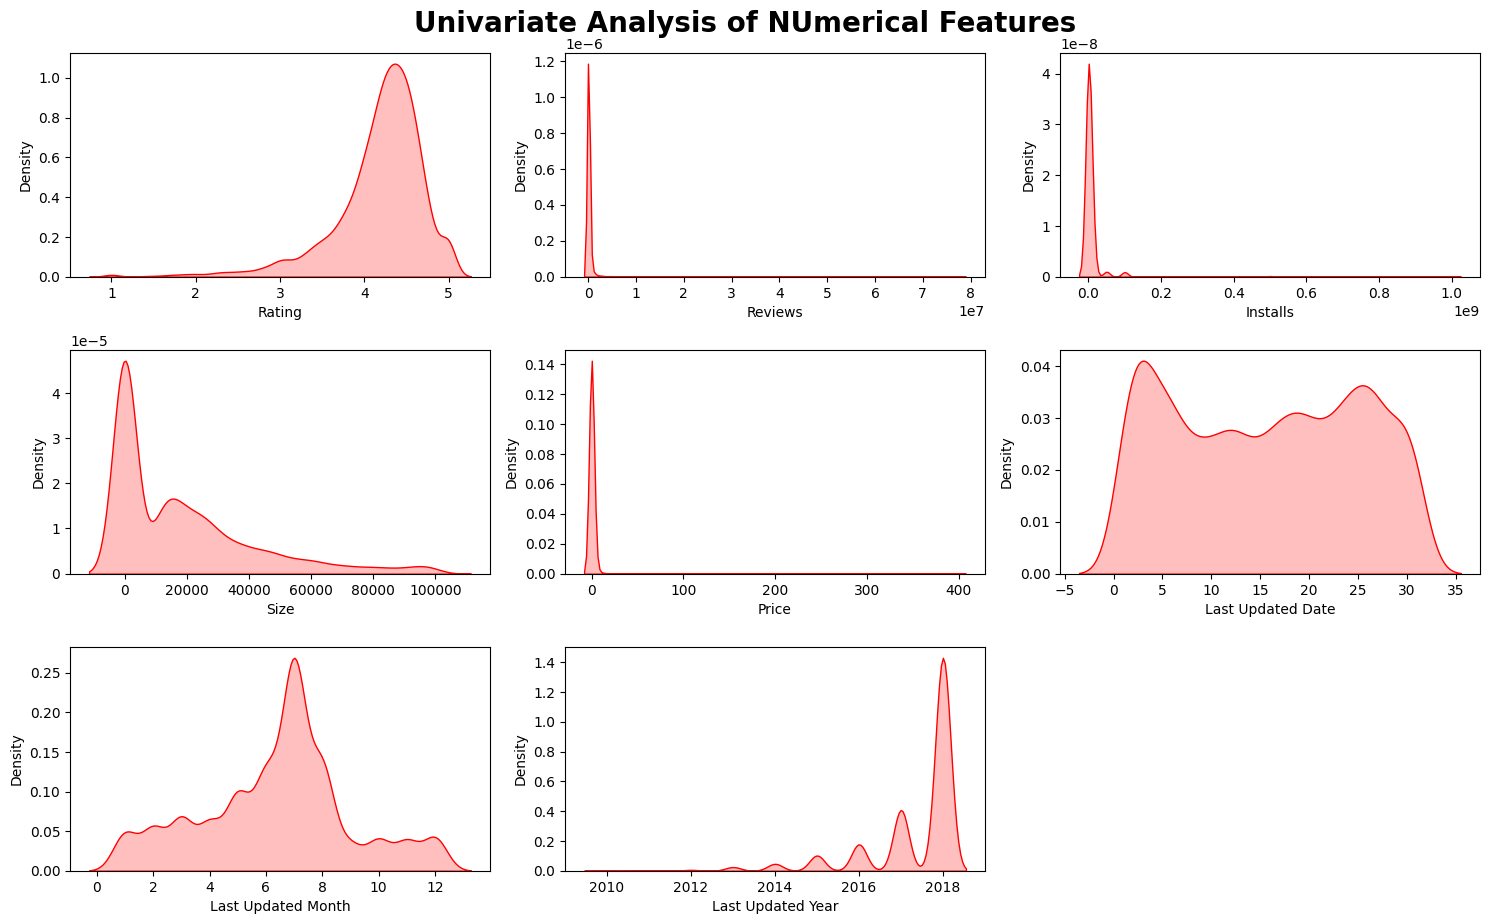

In [7]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of NUmerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(df[num_cols[i]], shade=True, color = 'r')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

1) Most of the ratings are between 3.5 and 5
2) Most of the apps have less than 10 million reviews, 100 million installs and 20 Mb of size
3) Almost all the apps are free to download
4) Majority of the updates have been pushed in 2nd and 3rd quarter of the year and have increase with the year

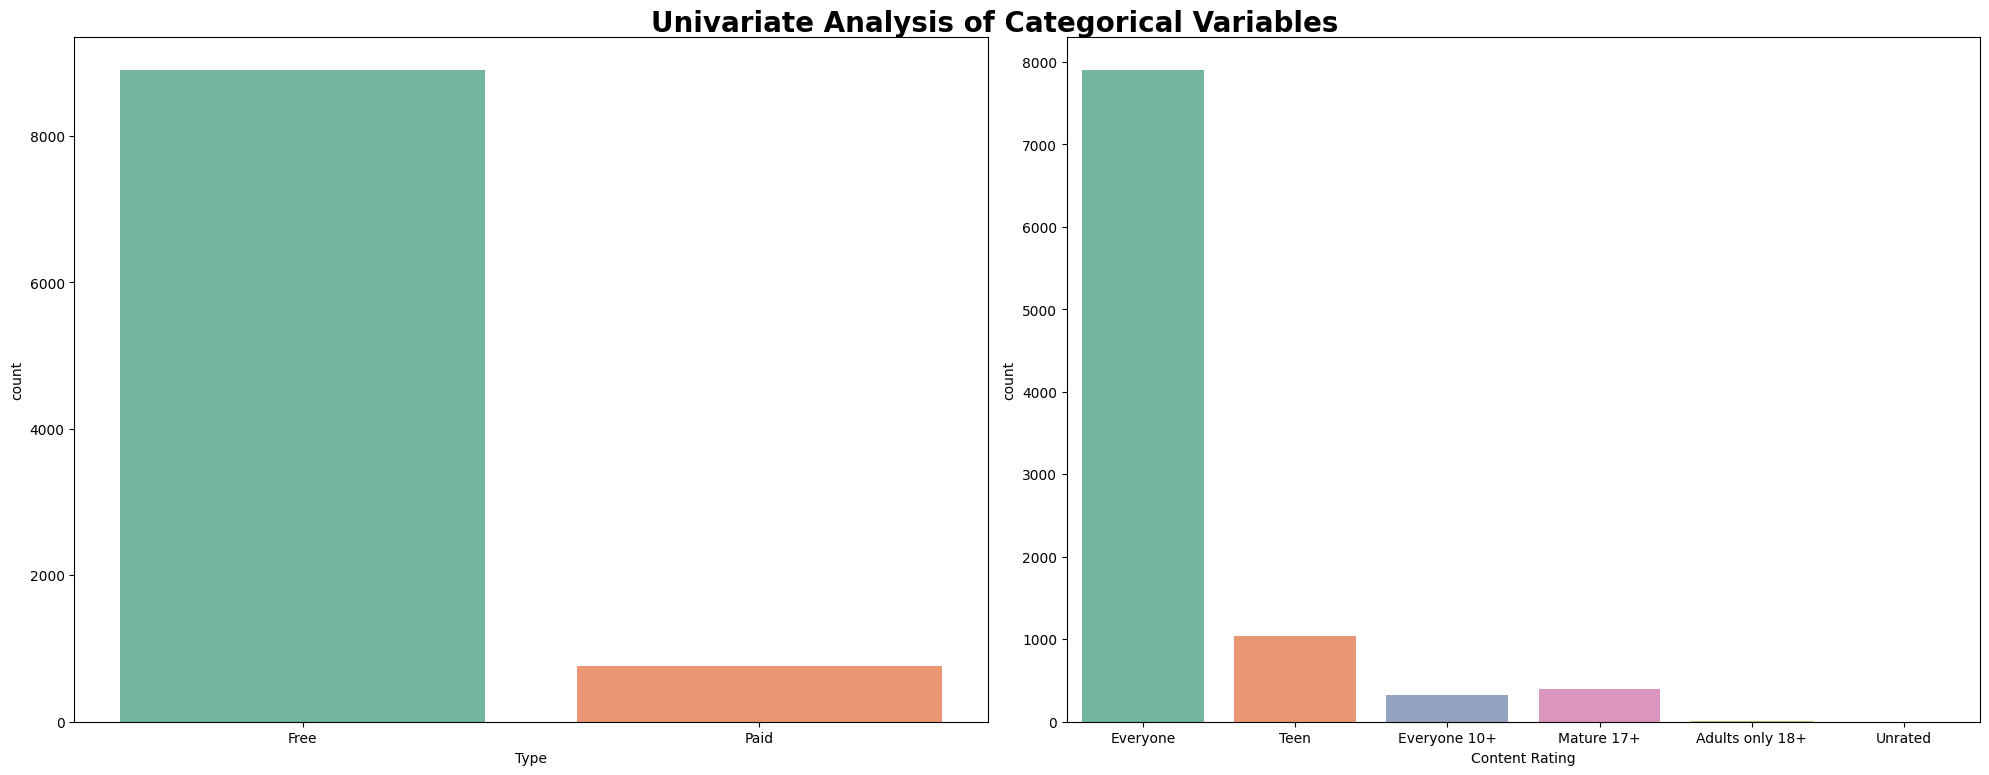

In [8]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Variables', fontsize=20, fontweight='bold')

cols = ['Type', 'Content Rating']

for i in range(0,len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]], palette = 'Set2')
    plt.tight_layout()

More than 92% apps are free and approximately 82% of the apps are suitable for All users 

<Axes: ylabel='count'>

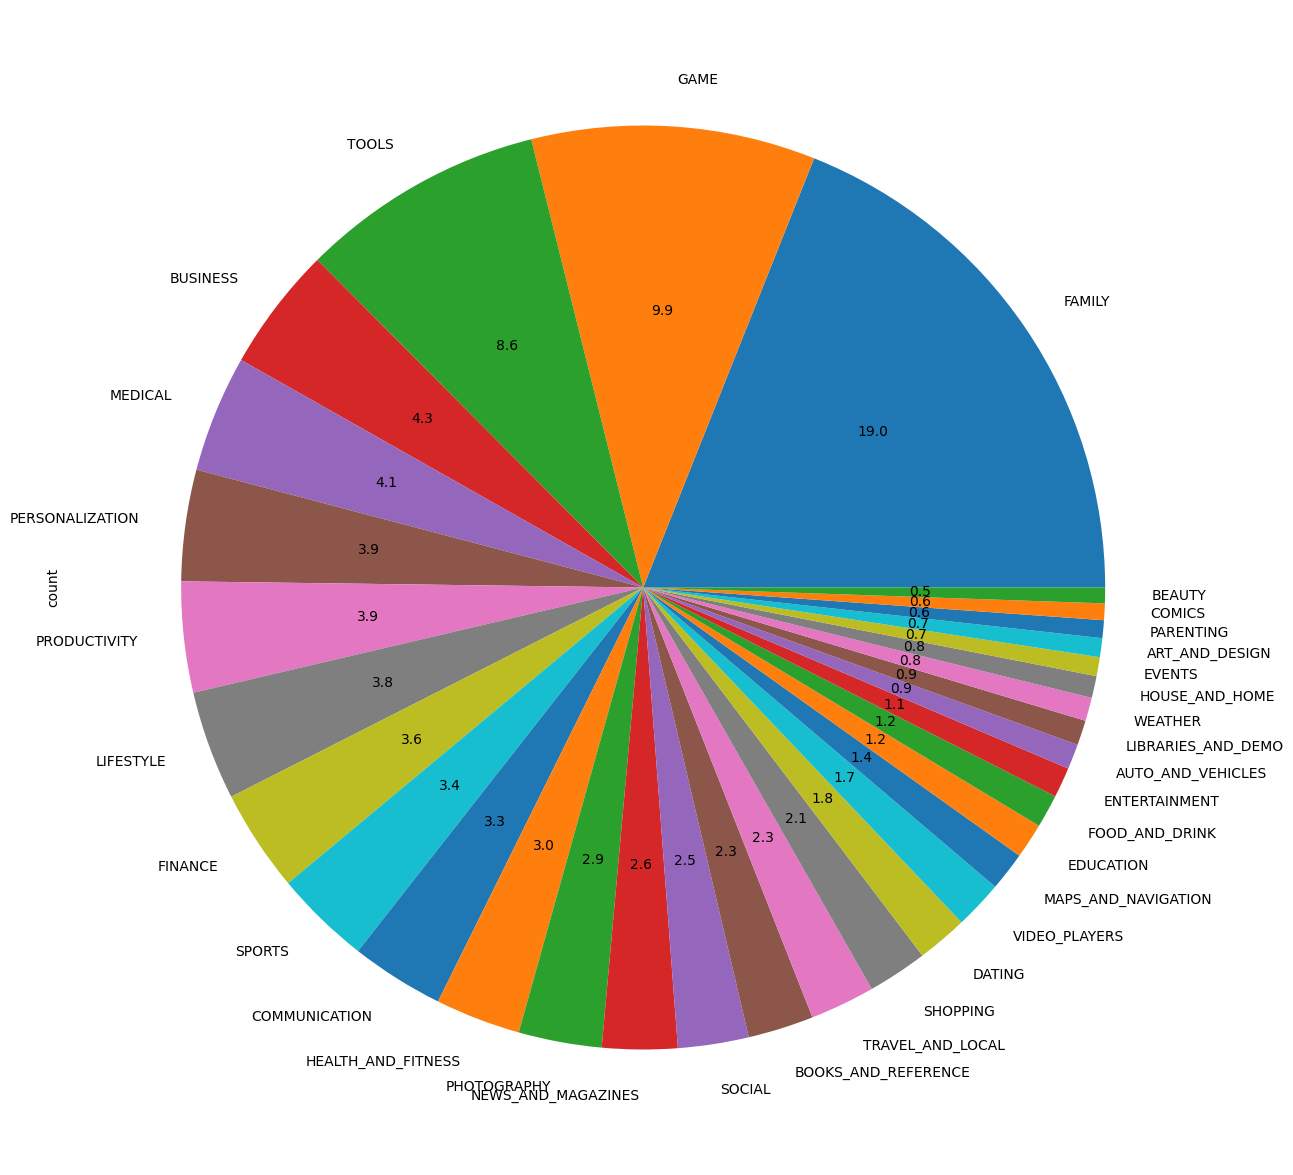

In [9]:
df['Category'].value_counts().plot.pie(y=df['Category'], figsize=(15,15), autopct = '%1.1f')

<li>19% apps belong to Family category, followed by Game with 9.9% and Tools with 8.6%
<li>Least number of apps are of Beauty (0.5%), Comics (0.6%) and Parenting (0.6%)

In [10]:
categories = pd.DataFrame(df['Category'].value_counts()).reset_index().rename(columns={'count':'Counts'})

In [11]:
# Top 5 App Categories

categories.head()

,Category,Counts
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [12]:
# Bottom 5 App Categories

categories.tail()

,Category,Counts
28,EVENTS,64
29,ART_AND_DESIGN,64
30,PARENTING,60
31,COMICS,56
32,BEAUTY,53


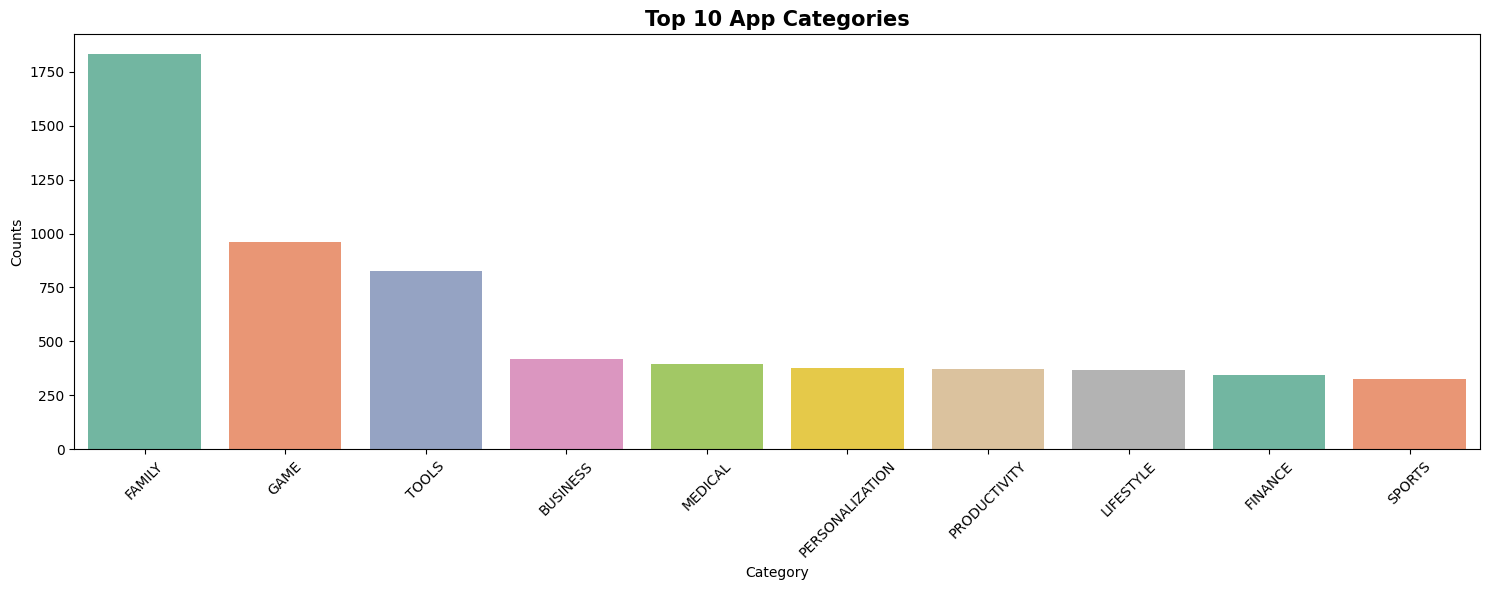

In [13]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Category', y='Counts', data = categories.head(10), palette = 'Set2')
plt.title('Top 10 App Categories', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

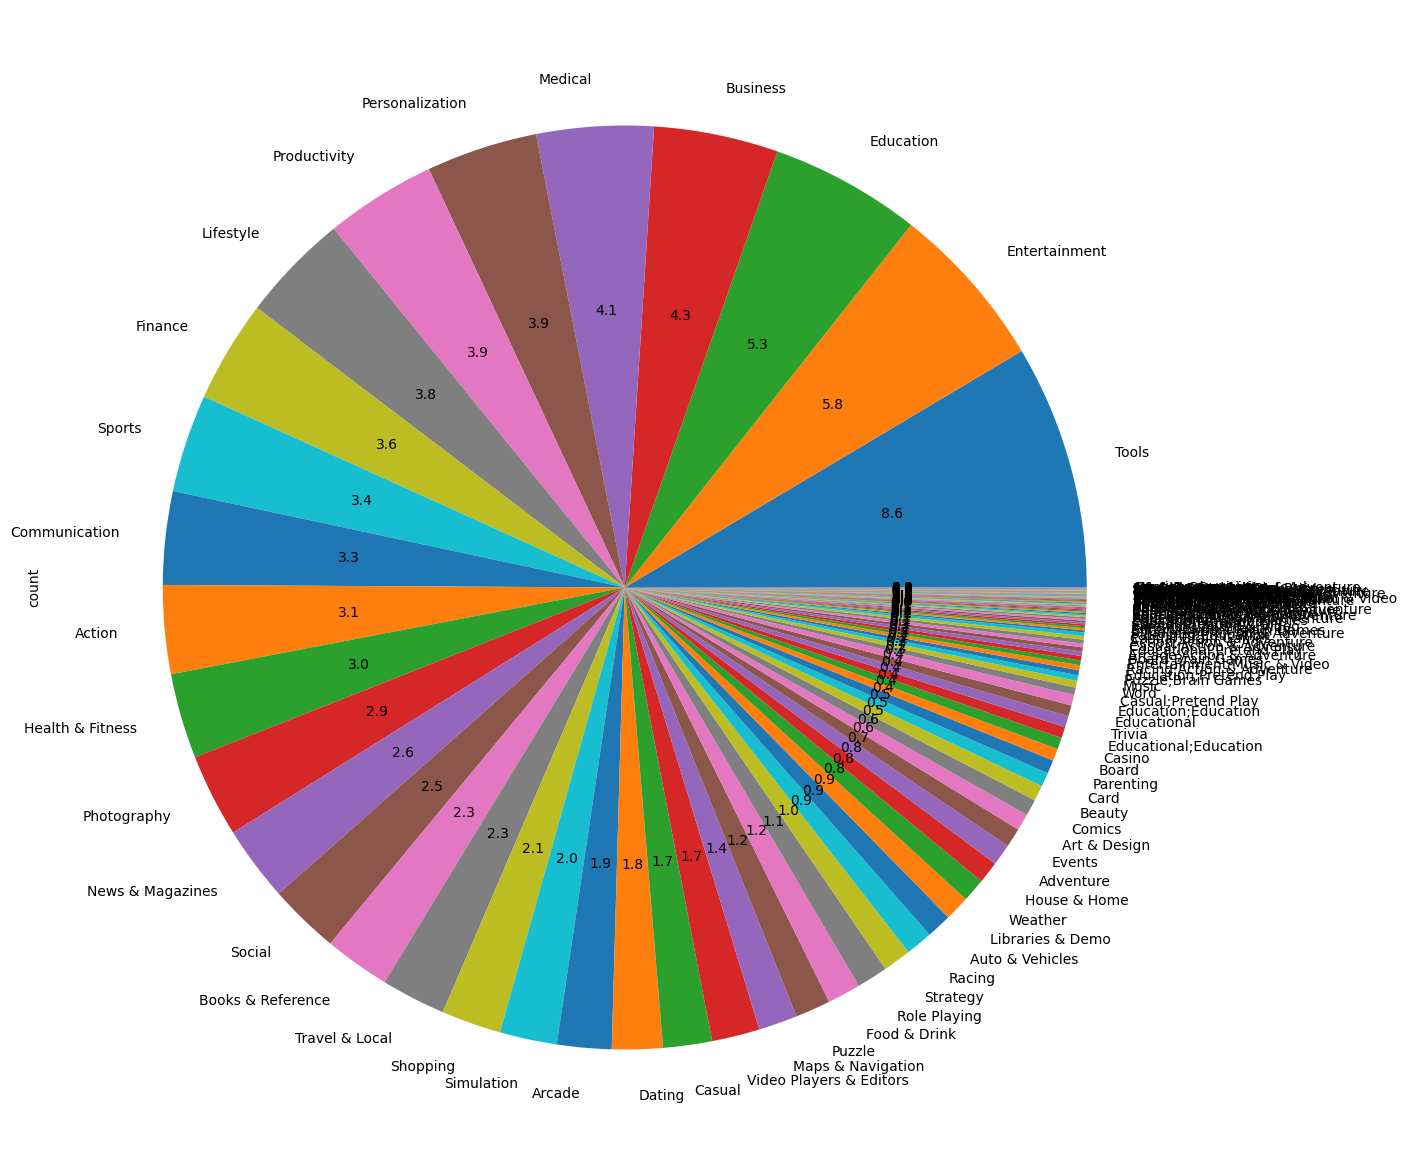

In [14]:
df['Genres'].value_counts().plot.pie(y=df['Genres'], figsize=(15,15), autopct = '%1.1f')

In [15]:
a = pd.DataFrame(df['Genres'].value_counts(normalize=True)*100).reset_index()
a.rename(columns = {'proportion':'Proportion'}, inplace = True)
a[a['Proportion'] < 1].shape[0]

90

<li> Top Genres include Tools (8.6%), Entertainment (5.8%), Education (5.3%)
<li> Proportion of 90 out of 118 Genres is less than 1%

In [16]:
genres = pd.DataFrame(df['Genres'].value_counts()).reset_index().rename(columns={'count':'Counts'})

In [17]:
# Top 5 Genres
genres.head()

,Genres,Counts
0,Tools,826
1,Entertainment,561
2,Education,510
3,Business,420
4,Medical,395


In [18]:
# Bottom 5 Genres
genres.tail()

,Genres,Counts
113,Art & Design;Pretend Play,1
114,Lifestyle;Pretend Play,1
115,Comics;Creativity,1
116,Art & Design;Action & Adventure,1
117,Strategy;Creativity,1


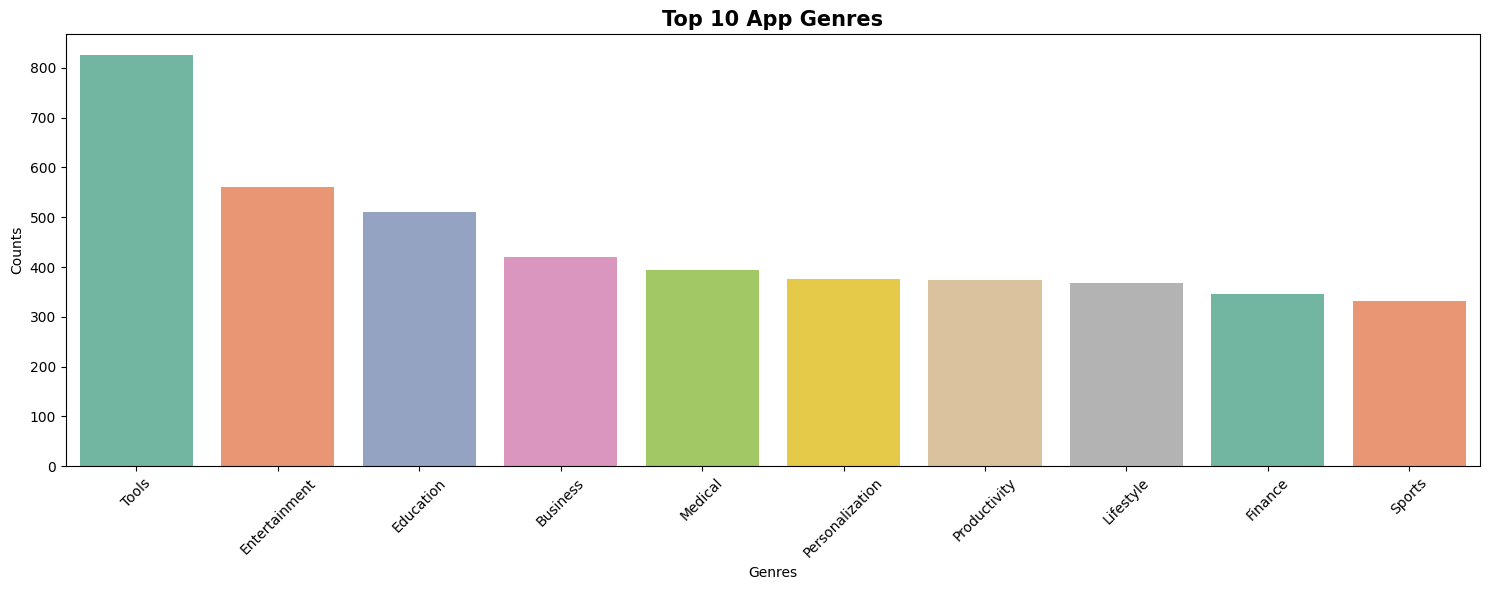

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'Genres', y='Counts', data = genres.head(10), palette = 'Set2')
plt.title('Top 10 App Genres', fontsize = 15, fontweight = 'bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
cat_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index().head(10)
cat_installs['Installs'] = cat_installs['Installs']/1000000000 # To convert value into billions
cat_installs

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


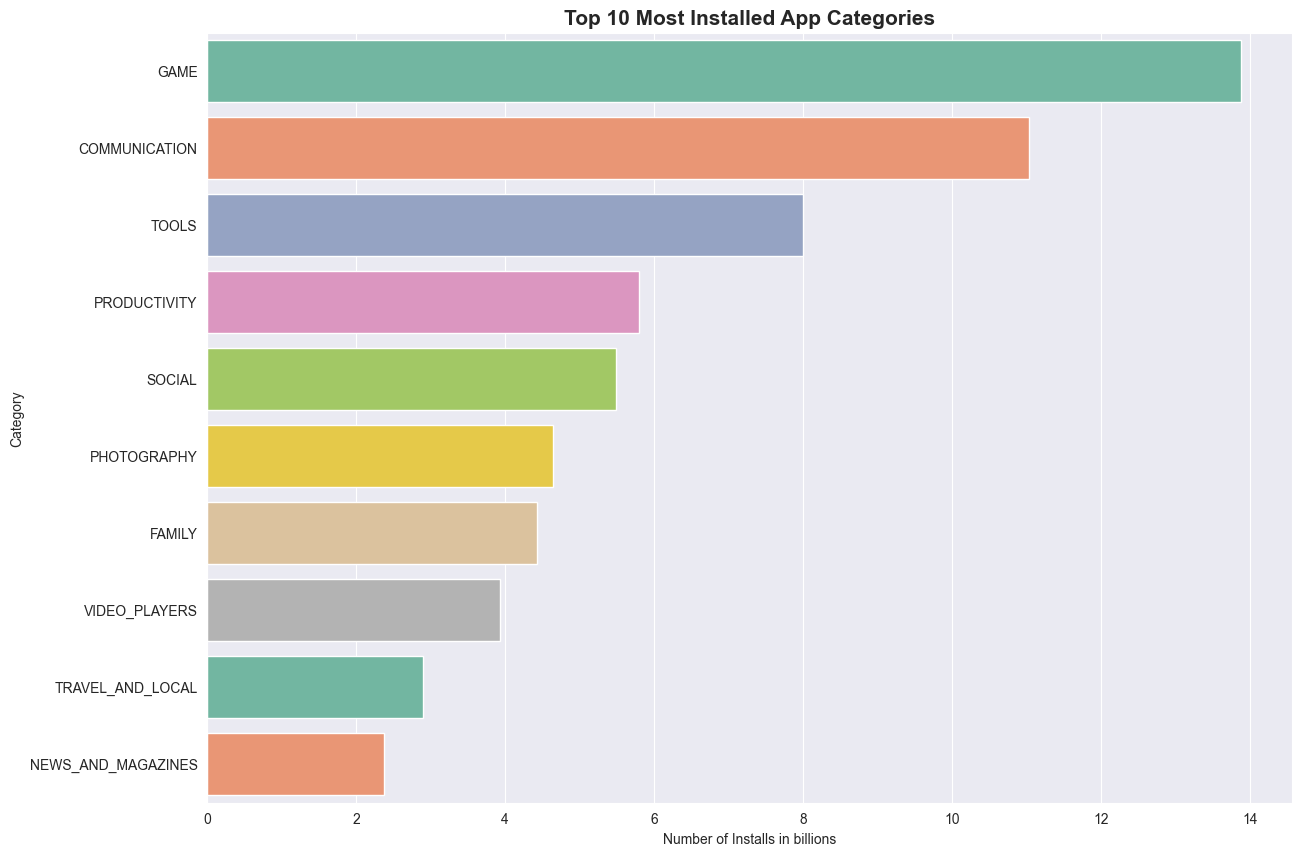

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
sns.barplot(data = cat_installs, x='Installs', y='Category', palette = 'Set2')
plt.title('Top 10 Most Installed App Categories', fontsize=15, fontweight='bold')
plt.xlabel('Number of Installs in billions')
plt.show()

In [22]:
top_cat_installs = df.groupby(['App','Category'])['Installs'].sum().sort_values(ascending=False).reset_index()
top_cat_installs['Installs'] = top_cat_installs['Installs']/1000000000
top_cat_installs.head()

,App,Category,Installs
0,Google Photos,PHOTOGRAPHY,1.0
1,Google+,SOCIAL,1.0
2,Google Drive,PRODUCTIVITY,1.0
3,Gmail,COMMUNICATION,1.0
4,Google News,NEWS_AND_MAGAZINES,1.0


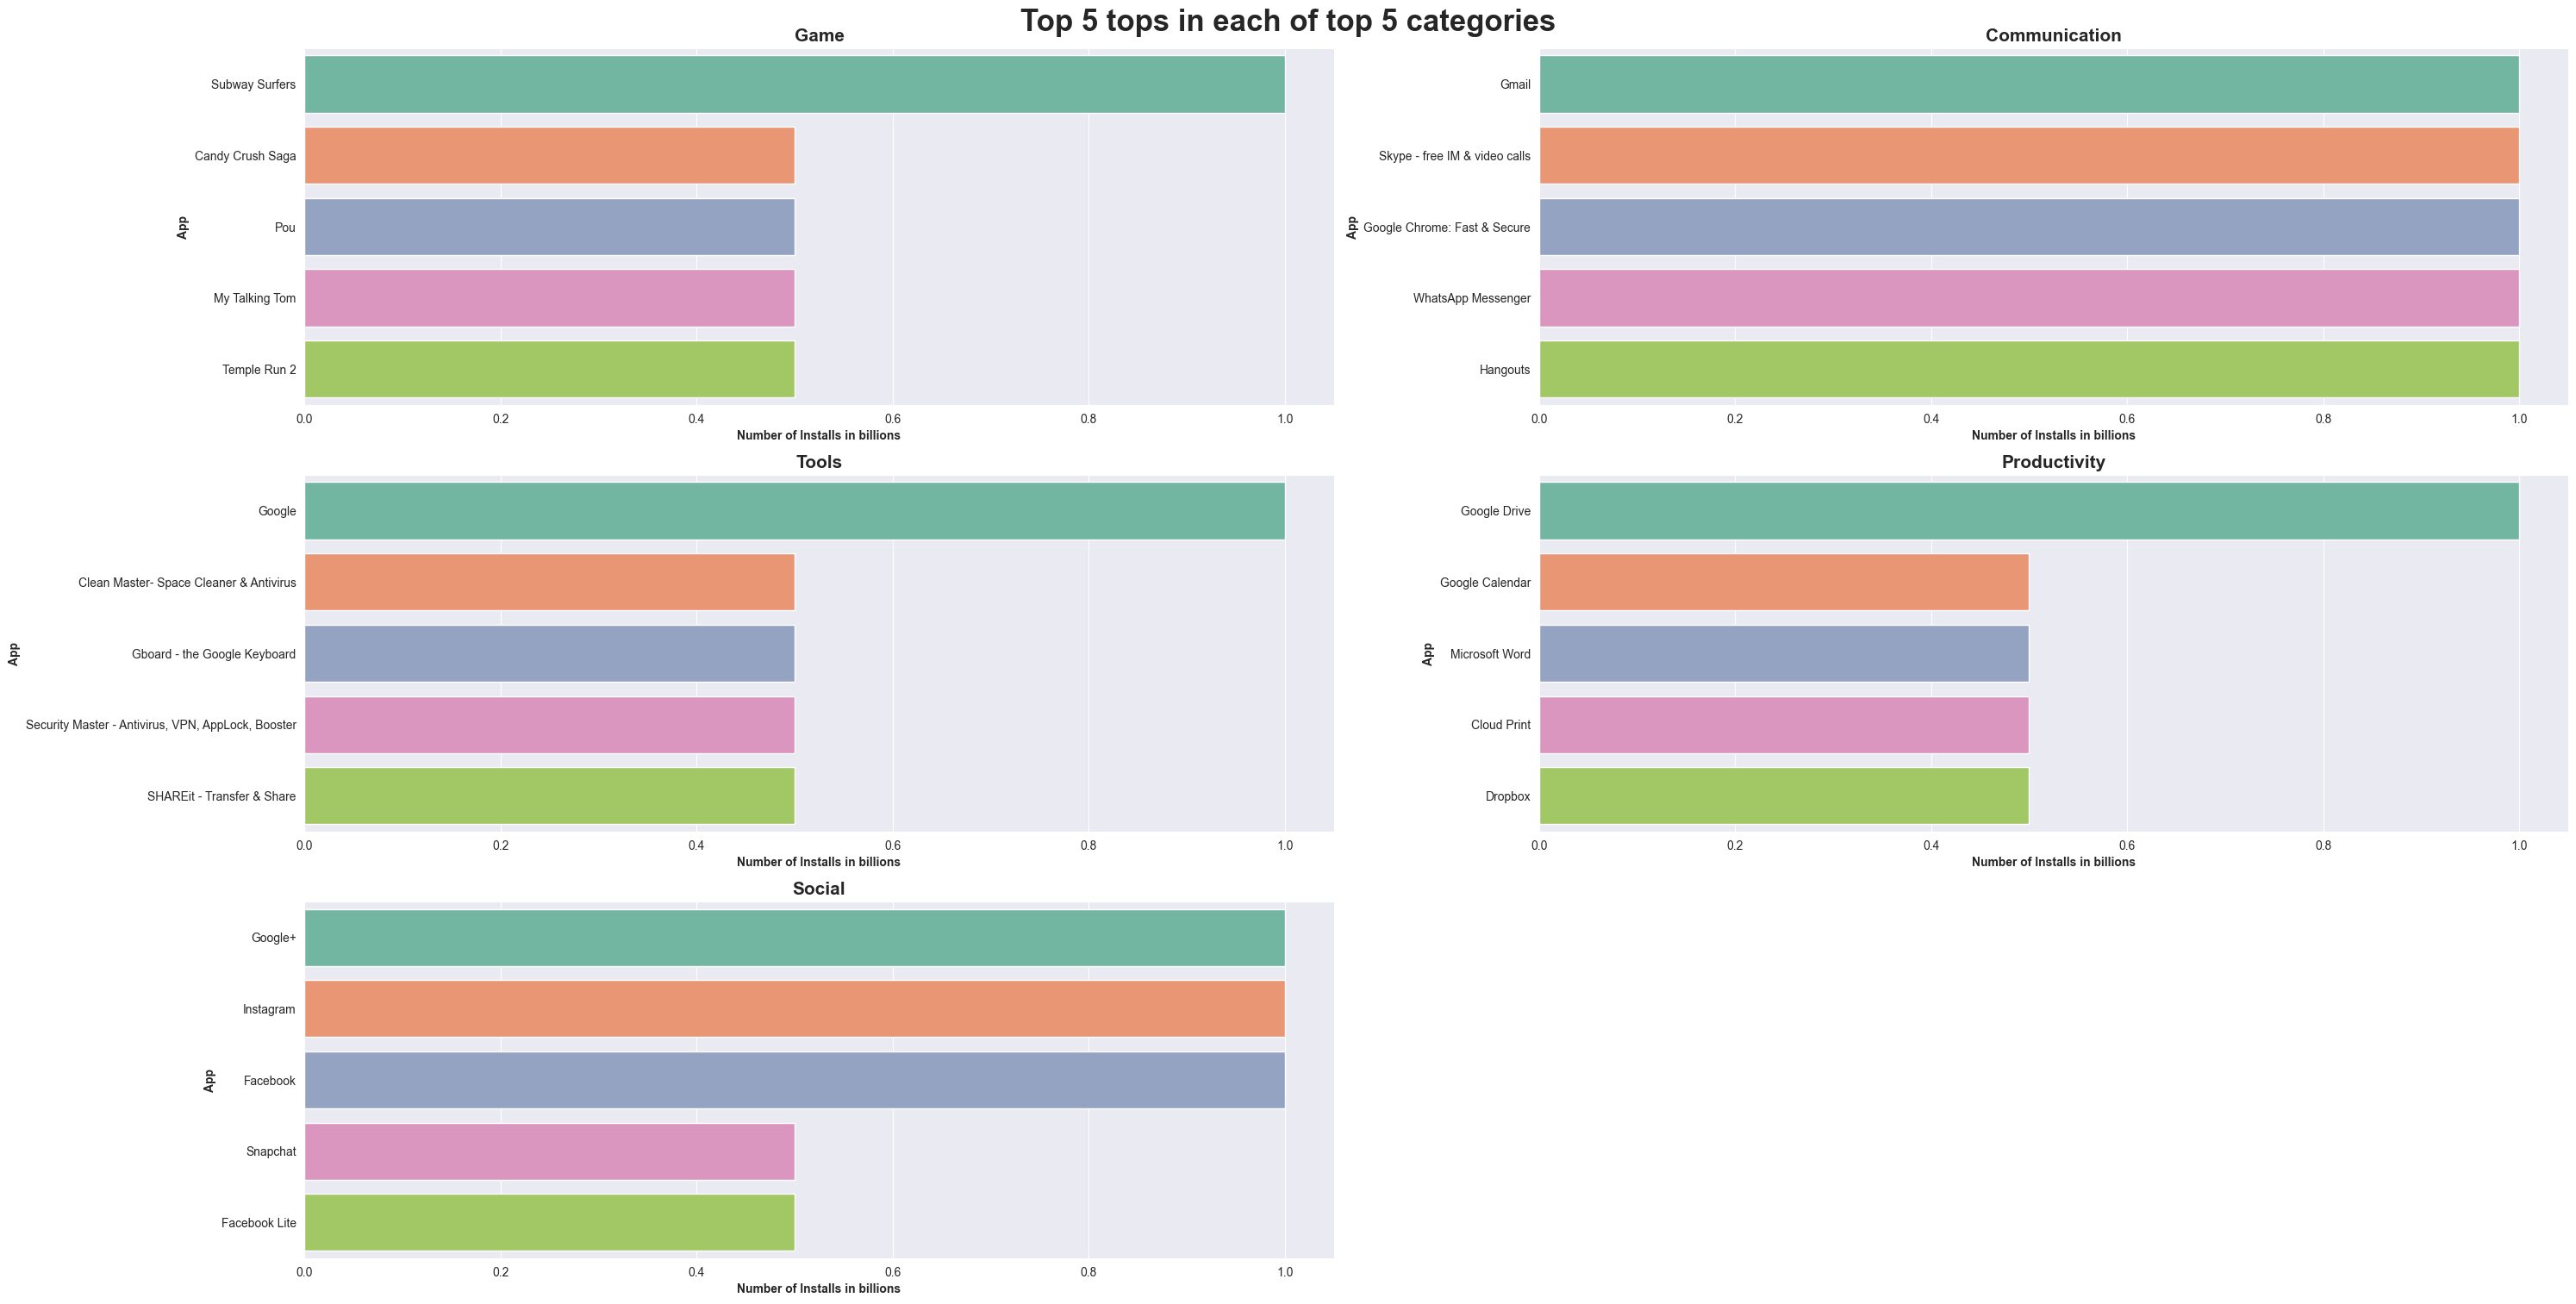

In [23]:
# Top 5 Apps in each of the top 5 Categories
top_cats = ['Game', 'Communication', 'Tools', 'Productivity', 'Social']

plt.figure(figsize=(30,20))
plt.suptitle('Top 5 tops in each of top 5 categories', fontweight='bold', fontsize = 25)

for i in range(0, len(top_cats)):
    plt.subplot(4,2, i+1)
    temp_data = top_cat_installs[top_cat_installs['Category']==top_cats[i].upper()].head(5)
    # print(temp_data)
    sns.barplot(data = temp_data, x='Installs', y='App', palette = 'Set2')
    plt.xlabel('Number of Installs in billions', fontweight='bold')
    plt.ylabel('App',fontweight='bold')
    plt.title(top_cats[i], fontweight='bold', fontsize = 15)
    plt.tight_layout()

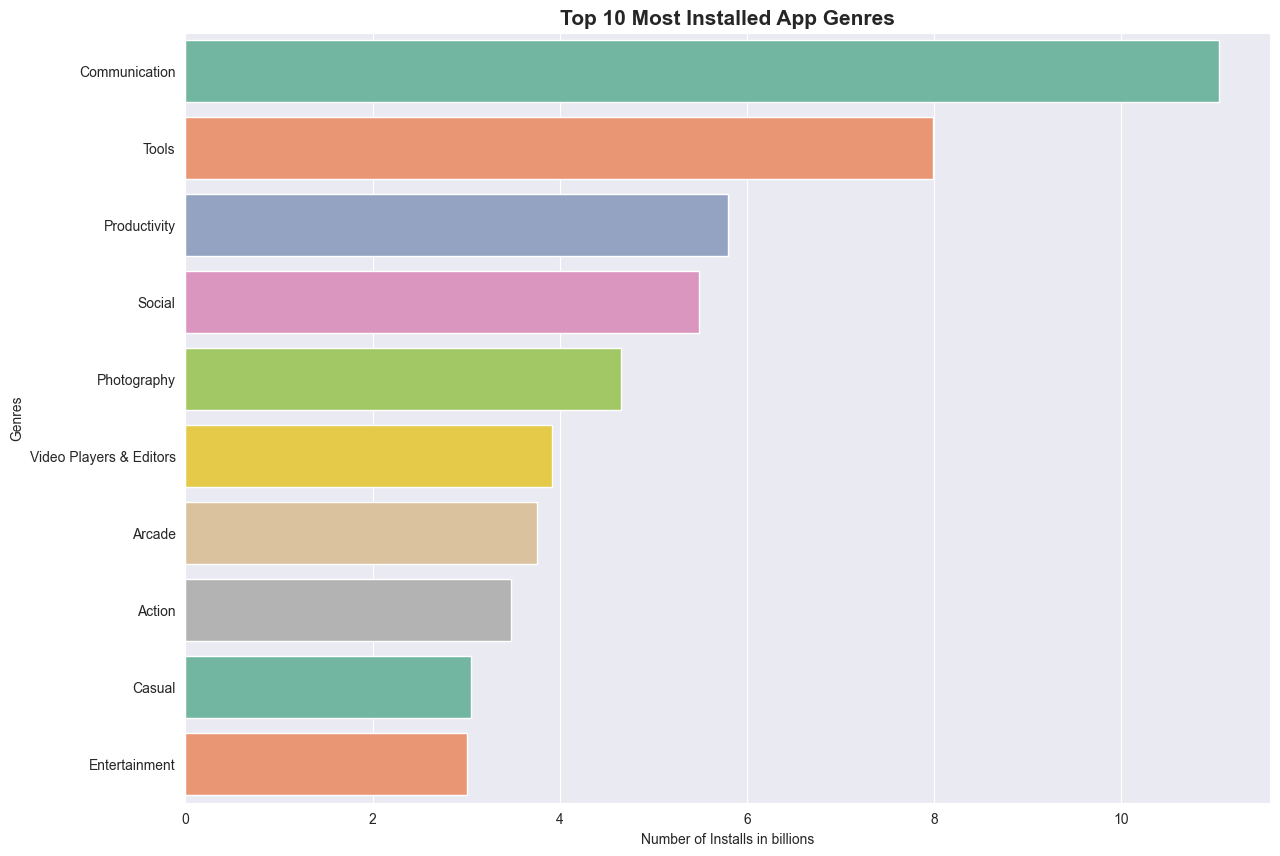

In [24]:
gen_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).reset_index().head(10)
gen_installs['Installs'] = gen_installs['Installs']/1000000000

sns.set_style('darkgrid')
plt.figure(figsize=(14,10))
sns.barplot(data = gen_installs, x='Installs', y='Genres', palette = 'Set2')
plt.title('Top 10 Most Installed App Genres', fontsize=15, fontweight='bold')
plt.xlabel('Number of Installs in billions')
plt.show()

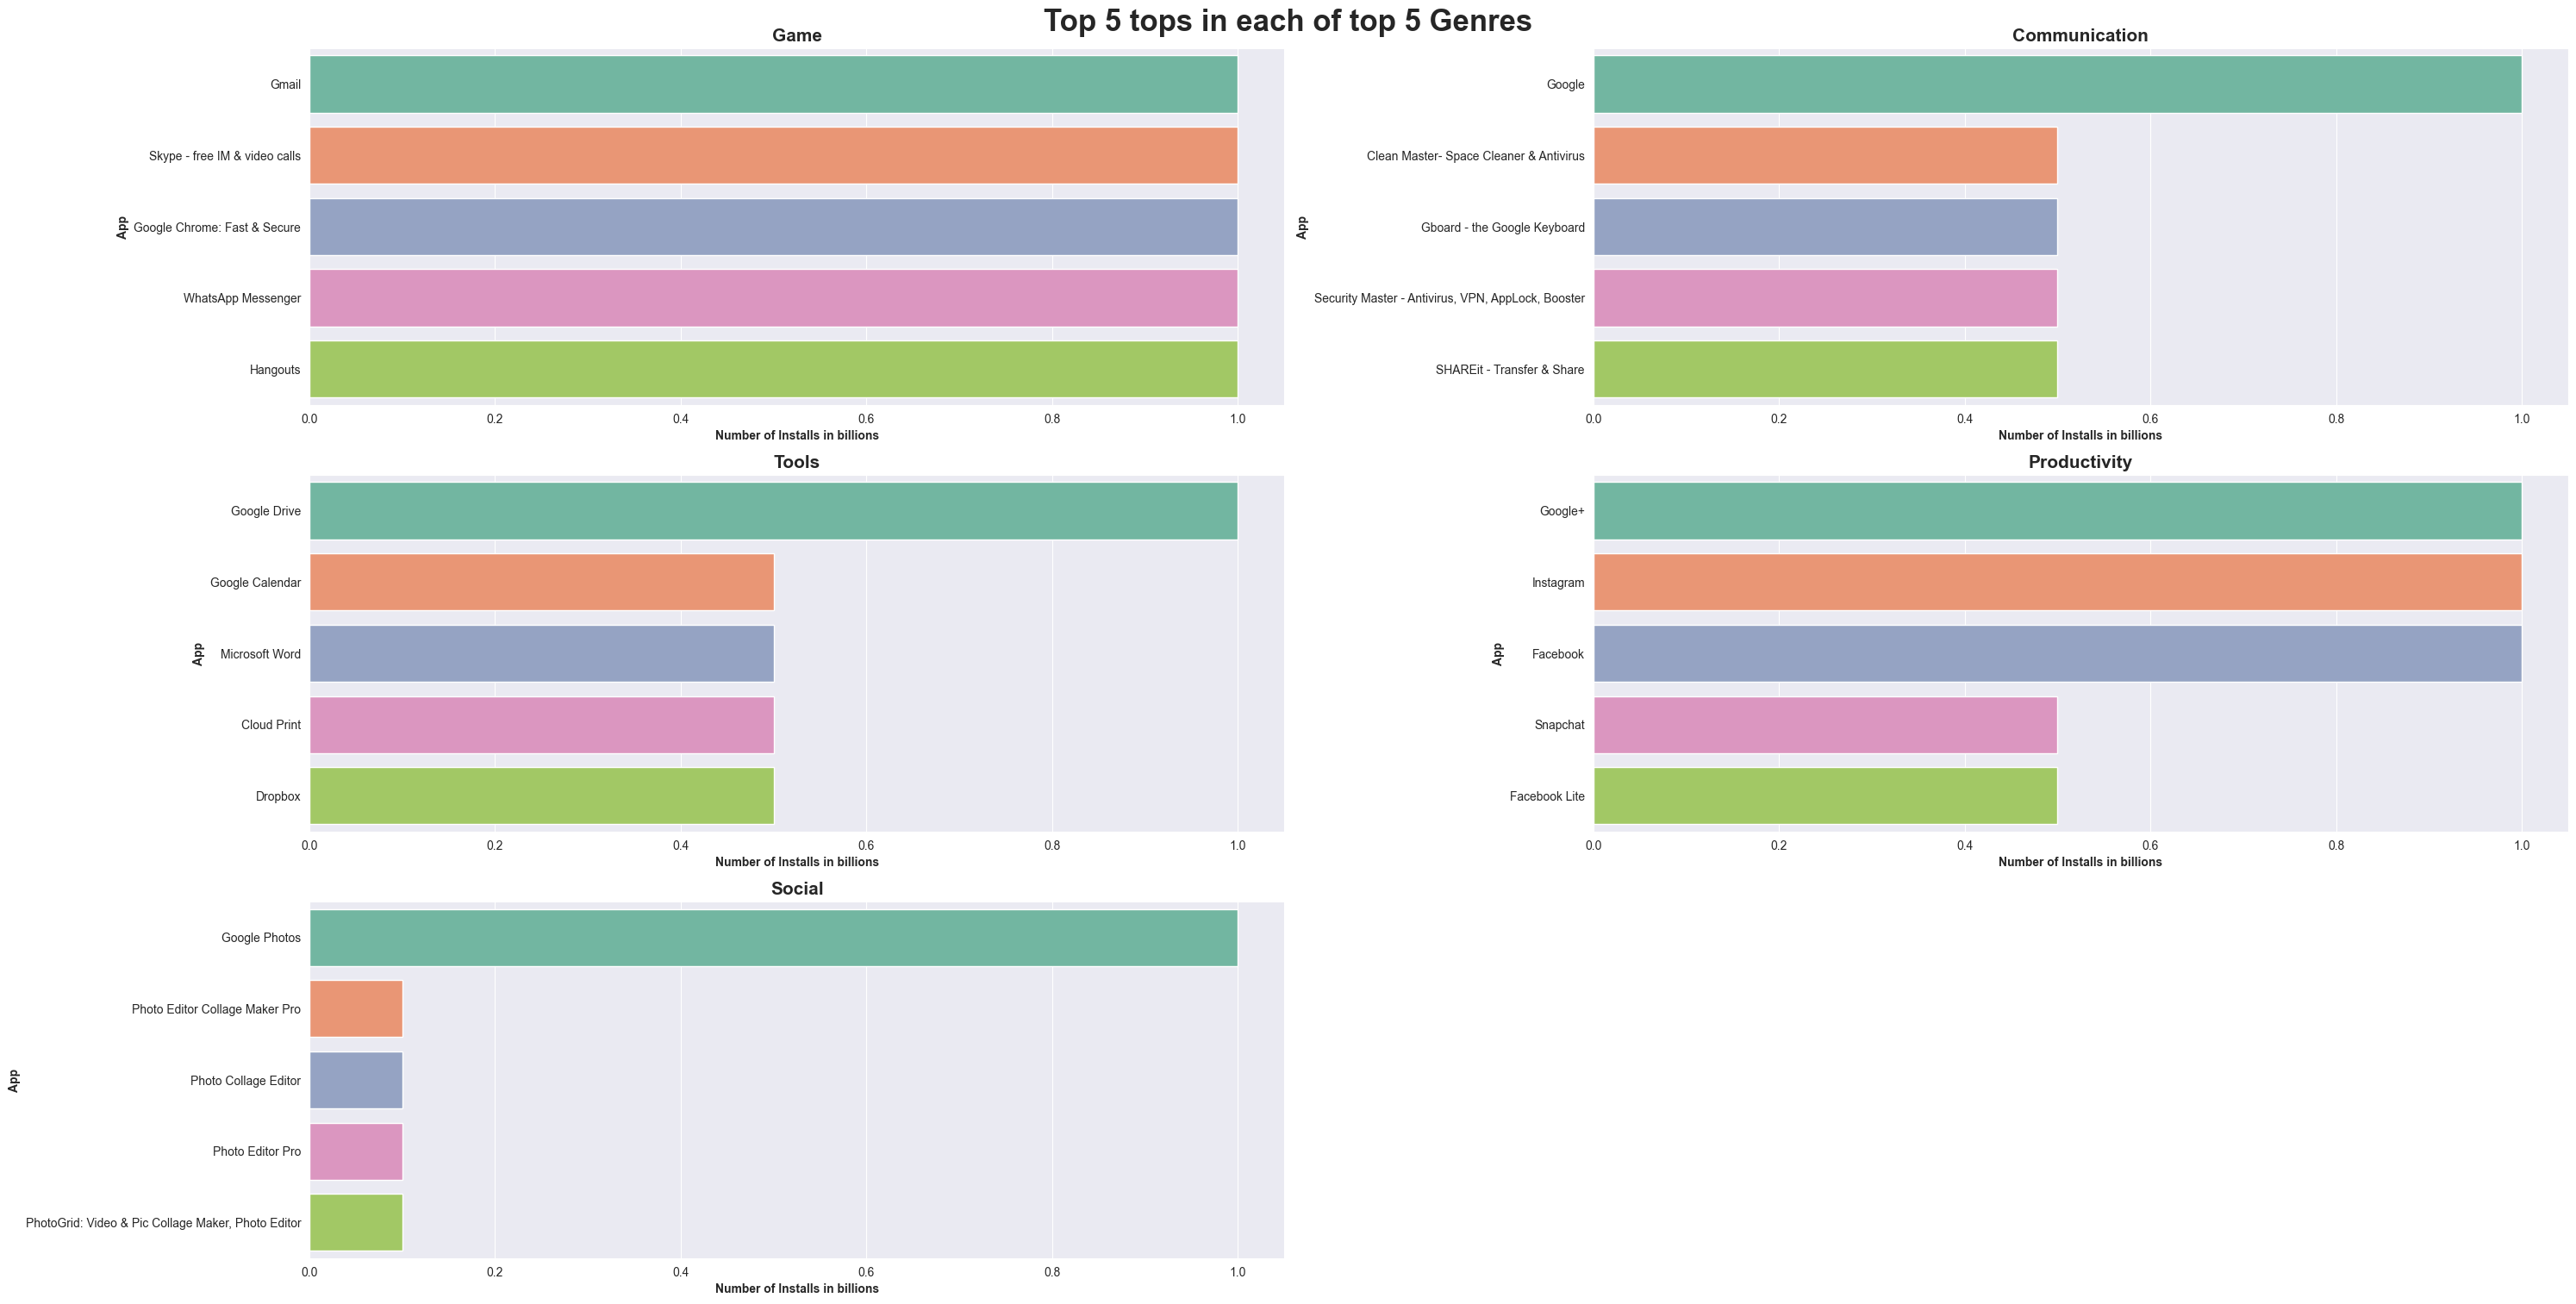

In [25]:
top_gen_installs = df.groupby(['App','Genres'])['Installs'].sum().sort_values(ascending=False).reset_index()
top_gen_installs['Installs'] = top_gen_installs['Installs']/1000000000

# Top 5 Apps in each of the top 5 Genres
top_gens = ['Communication', 'Tools', 'Productivity', 'Social', 'Photography']

plt.figure(figsize=(30,20))
plt.suptitle('Top 5 tops in each of top 5 Genres', fontweight='bold', fontsize = 25)

for i in range(0, len(top_gens)):
    plt.subplot(4,2, i+1)
    temp_data = top_gen_installs[top_gen_installs['Genres']==top_gens[i]].head(5)
    # print(temp_data)
    sns.barplot(data = temp_data, x='Installs', y='App', palette = 'Set2')
    plt.xlabel('Number of Installs in billions', fontweight='bold')
    plt.ylabel('App',fontweight='bold')
    plt.title(top_cats[i], fontweight='bold', fontsize = 15)
    plt.tight_layout()

In [26]:
top_ratings = df.groupby(['Category','Installs', 'App'])['Rating'].sum().sort_values(ascending = False).reset_index().sort_values(by = 'Installs', ascending = False)
top_ratings['Installs'] = top_ratings['Installs']/1000000000

In [27]:
print(f"There are total {top_ratings[top_ratings['Rating']>=4.5]['App'].nunique()} apps with ratings more than 4.5")

There are total 2550 apps with ratings more than 4.5


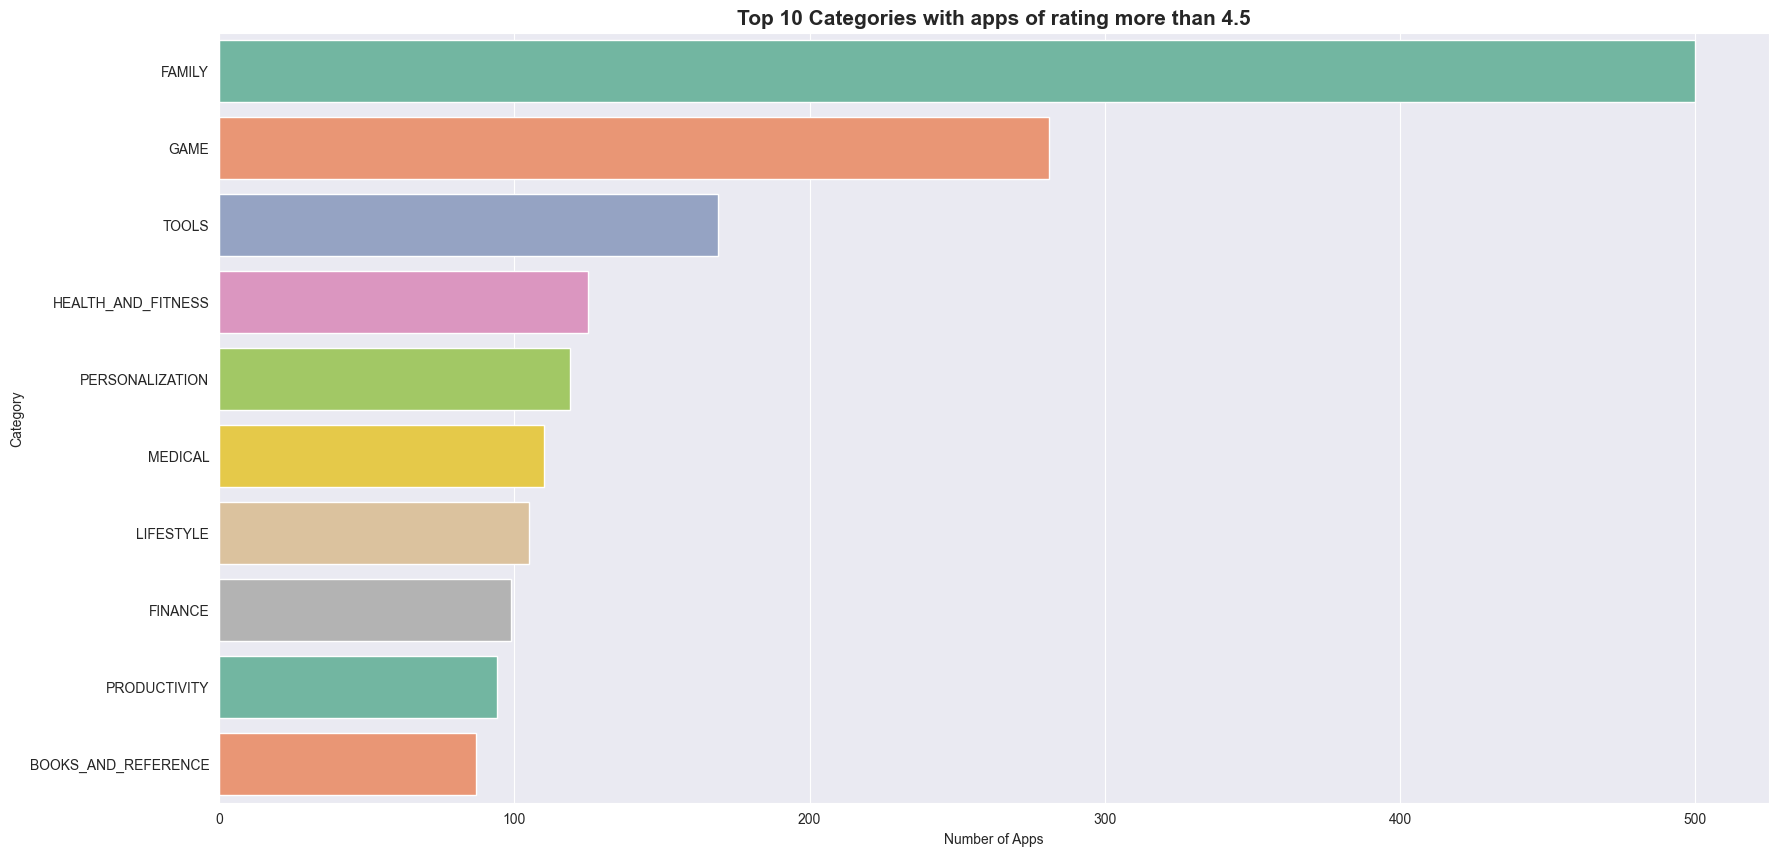

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.barplot(top_ratings[top_ratings['Rating']>=4.5]['Category'].value_counts().reset_index().head(10), x = 'count', y='Category', palette = 'Set2')
plt.title('Top 10 Categories with apps of rating more than 4.5', fontsize=15, fontweight='bold')
plt.xlabel('Number of Apps')
plt.show()